In [264]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.metrics import r2_score

In [265]:
X, Y = load_boston().data, load_boston().target

**Linear Regression**

the formula for linear regression is $\hat{Y} = \beta_{0} + \sum \limits _{j=1} ^{p} X_{j}\hat{\beta}_{j} $. 
It can be solved using $\frac{\partial RSS}{\partial{\beta}} = 0$


In [284]:
class LinearRegression():
    def __init__(self, fit_intercept=False):
        self.fit_intercept = fit_intercept
        
    def _add_intercept(self):     
        if self.fit_intercept:
            x0_array = np.ones([self.X.shape[0], 1])
            self.X = np.concatenate((x0_array, self.X), axis=1)
        
    def fit(self, X, Y):
        self._add_intercept()
        X_X = X.T @ X
        X_Y = X.T @ Y
        self.beta = np.linalg.inv(X_X) @ X_Y
        
    def predict(self, X):
        return X @ self.beta
    
class Ridge(LinearRegression):
    def __init__(self, alpha=0.1, **kwargs):
        super().__init__(**kwargs)
        self.alpha = alpha
        
    def fit(self, X, Y):
        alpha_mat = np.eye(X.shape[1]) * self.alpha
        X_X = X.T @ X + alpha_mat
        X_Y = X.T @ Y
        self.beta = np.linalg.inv(X_X) @ X_Y
        
        
class Lasso:
    def __init__(self, alpha=1.0, *, fit_intercept=True, max_iter=1000, tol=0.01):
        self.alpha = alpha
        self.fit_intercept = fit_intercept
        self.max_iter = max_iter
        self.tol = tol
        
    def _add_intercept(self, X):
        """
        Function is responsible for adding intercept to features.
        
        Parameters
        ----------
        X : DataFrame
            Features
            
        Returns
        -------
        DataFrame
            Features with ones in the first column.
        """
        intercept = np.ones(X.shape[0]).reshape(-1, 1)
        X = np.concatenate((intercept, X), axis=1)
        return X
    
    def _get_regularization(self, weigth):
        return self.alpha * np.sign(weight)
    
    def fit(self, X, Y):
        if self.fit_intercept:
            X = self._add_intercept(X)
            
        n, m = X.shape
        beta = np.zeros(m)
        
        for i in range(self.max_iter):
            beta = self.update_beta(beta, X, Y)
        
        self.beta = beta
    
    def update_beta(self, beta, X, Y):
        Y_pred = X @ beta
        gradient = -(X.T @ (Y - Y_pred)) + alpha * np.sign(beta)
        beta -= tol * gradient / n
        return beta
    
    def predict(self, X):
        if self.fit_intercept:
            X = self._add_intercept(X)
        print(X)
        return X @ beta

In [267]:
model = LinearRegression()
model.fit(X, Y)
Y_pred = model.predict(X)
r2_score(Y_pred, Y)

0.6167576730333505

In [268]:
model = Ridge()
model.fit(X, Y)
Y_pred = model.predict(X)
r2_score(Y_pred, Y)

0.6165888743237311

[[ 1.          0.        ]
 [ 1.          0.20408163]
 [ 1.          0.40816327]
 [ 1.          0.6122449 ]
 [ 1.          0.81632653]
 [ 1.          1.02040816]
 [ 1.          1.2244898 ]
 [ 1.          1.42857143]
 [ 1.          1.63265306]
 [ 1.          1.83673469]
 [ 1.          2.04081633]
 [ 1.          2.24489796]
 [ 1.          2.44897959]
 [ 1.          2.65306122]
 [ 1.          2.85714286]
 [ 1.          3.06122449]
 [ 1.          3.26530612]
 [ 1.          3.46938776]
 [ 1.          3.67346939]
 [ 1.          3.87755102]
 [ 1.          4.08163265]
 [ 1.          4.28571429]
 [ 1.          4.48979592]
 [ 1.          4.69387755]
 [ 1.          4.89795918]
 [ 1.          5.10204082]
 [ 1.          5.30612245]
 [ 1.          5.51020408]
 [ 1.          5.71428571]
 [ 1.          5.91836735]
 [ 1.          6.12244898]
 [ 1.          6.32653061]
 [ 1.          6.53061224]
 [ 1.          6.73469388]
 [ 1.          6.93877551]
 [ 1.          7.14285714]
 [ 1.          7.34693878]
 

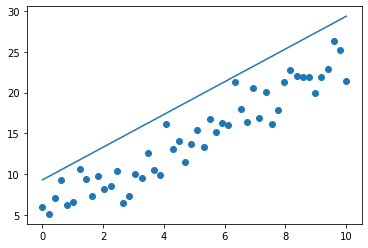

In [286]:
rng = np.random.RandomState(42)
X = np.linspace(0, 10, 50)
Y = 5 + 2 * X + rng.randn(50) * 2

lasso = Lasso()
lasso.fit(X.reshape(-1,1), Y)
Y_pred = lasso.predict(X.reshape(-1,1))
plt.scatter(X, Y)
plt.plot(X, Y_pred)

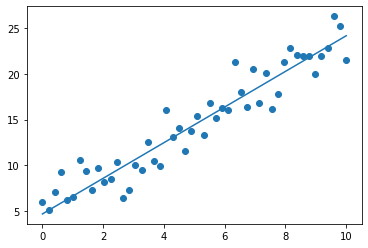

In [287]:
temp_X = np.insert(X.reshape(-1,1), 0, 1, axis=1)
Y_pred= temp_X @ lasso.beta
plt.scatter(X, Y)
plt.plot(X, Y_pred)

In [271]:
X

array([ 0.        ,  0.20408163,  0.40816327,  0.6122449 ,  0.81632653,
        1.02040816,  1.2244898 ,  1.42857143,  1.63265306,  1.83673469,
        2.04081633,  2.24489796,  2.44897959,  2.65306122,  2.85714286,
        3.06122449,  3.26530612,  3.46938776,  3.67346939,  3.87755102,
        4.08163265,  4.28571429,  4.48979592,  4.69387755,  4.89795918,
        5.10204082,  5.30612245,  5.51020408,  5.71428571,  5.91836735,
        6.12244898,  6.32653061,  6.53061224,  6.73469388,  6.93877551,
        7.14285714,  7.34693878,  7.55102041,  7.75510204,  7.95918367,
        8.16326531,  8.36734694,  8.57142857,  8.7755102 ,  8.97959184,
        9.18367347,  9.3877551 ,  9.59183673,  9.79591837, 10.        ])